输入：

周一到周日的起床时间
W = ("8:21","8:10","7:50","8:15","7:50","8:31","9:10") 

前一晚上床时间：

S = ("23:32","23:35","23:32","23:05","23:47","24:31","23:57")

输出：

睡眠时间统计图像

柱子越往上浮表示作息越早
就是太丑了，感觉还不如用PPT手画好看，有兴趣的话可以美化一下

copyright:许志翔

联系方式：mr_xuzhixiang@qq.com

In [1]:
import numpy as np
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# 将全局的字体设置为仿宋
mpl.rcParams['font.sans-serif'] = ['STFangsong']  

# 配置坐标轴刻度值模式，显示负号
mpl.rcParams['axes.unicode_minus'] = True

In [3]:
S = ("23:32","23:35","23:32","23:05","23:47","24:31","23:57") # 前一晚上床时间
W = ("8:21","8:10","7:50","8:15","7:50","8:31","9:10") # 当日起床时间

In [4]:
s = [] # 上床时间离零点的分钟数（正）
w = [] # 起床时间离零点的分钟数（负）
dt = [] # 睡眠时长

# 把时间转成距零点的分钟数
for i in range(7):
    st = S[i].split(":")
    wt = W[i].split(":")
    st = [float(j) for j in st] # 字符串转为浮点型
    wt = [float(j) for j in wt]
    
    s.append(24*60 - 60*st[0] - st[1])
    w.append(-60*wt[0] - wt[1])

s = np.array(s)
w = np.array(w)
dt = s - w

print(s)
print(w)
print(dt)

[ 28.  25.  28.  55.  13. -31.   3.]
[-501. -490. -470. -495. -470. -511. -550.]
[529. 515. 498. 550. 483. 480. 553.]


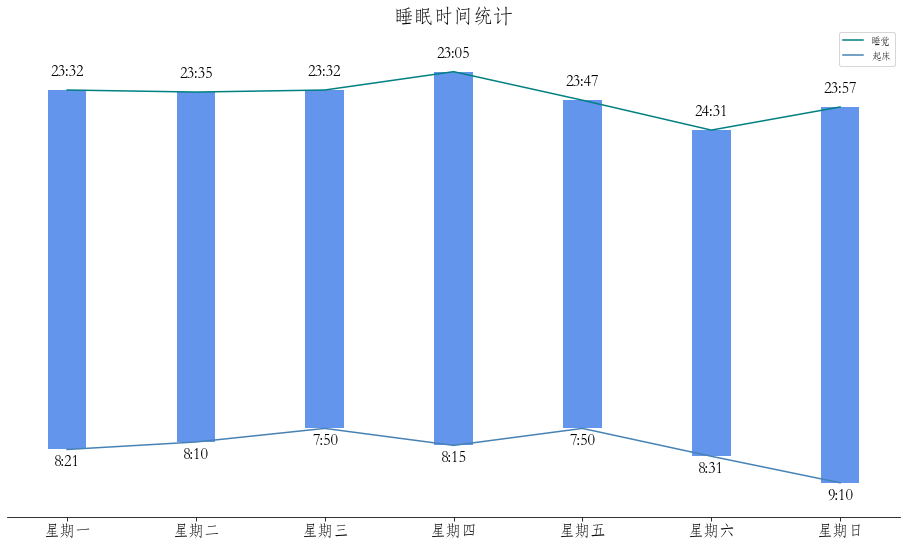

In [5]:
# 绘图
fig, ax=plt.subplots(figsize=(16, 9))
# plt.xlim((-0.5, 6.5))
plt.ylim((-600, 120)) # 22：00到10：00
plt.title('睡眠时间统计',fontsize=20)
x = np.arange(7)

x_ticks = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]
y_ticks = ['22:00','23:00','24:00','8:00','9:00','10:00']
plt.xticks(x, x_ticks, fontsize=16)

val_y = [120, 60, 0, -480, -540, -600]
#plt.yticks(val_y,y_ticks)
plt.yticks([],y_ticks)
    
plt.plot(x,s, 'teal', label ="睡觉")
# 添加数据标签
for tx, ty ,t in zip(x, s, S):
    plt.text(tx, ty+15, t, ha='center', va='bottom', fontsize=16)

plt.plot(x,w,'steelblue', label ="起床")
# 添加数据标签
for tx, ty ,t in zip(x, w, W):
    plt.text(tx, ty-30, t, ha='center', va='bottom', fontsize=16)
    
# 画柱状图
plt.bar(x, dt,color='cornflowerblue', width=0.3,bottom = w)

#去掉边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
  
plt.legend()

#plt.savefig('睡眠时间统计.png')

plt.show()
